<img src = "https://slitayem.github.io/img/blog/2020-08-04/churn.png" width=50%>

#### Here, using a customers related dataset, I made a model to recognize the customers which will go out of the existing ones cycle.

## Importing the libraries

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import sklearn
import warnings
from sklearn.preprocessing import LabelEncoder
from IPython.display import Image
import scipy
import plotly.express as px
from itertools import product
import statsmodels.api as sm
import datetime
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import ListedColormap
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBClassifier
warnings.filterwarnings('ignore')

## Load and Prepare Data

In [2]:
mydata = pd.read_csv ('Churn.csv')

## EDA

In [3]:
mydata.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
mydata.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [5]:
mydata.sample(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
2722,2723,15675422,Conway,544,France,Female,32,9,110728.39,1,1,1,14559.62,0
527,528,15573318,Kung,610,France,Male,26,8,0.00,2,1,0,166031.08,0
9526,9527,15665521,Chiazagomekpele,642,Germany,Male,18,5,111183.53,2,0,1,10063.75,0
4070,4071,15611551,Hill,676,Spain,Male,48,1,131659.59,2,0,1,14152.15,0
7982,7983,15665129,Kapustin,545,Germany,Male,33,1,132527.90,2,0,1,107429.71,0
3963,3964,15629603,Chuang,607,France,Male,31,8,0.00,2,1,1,43196.50,0
4653,4654,15579617,Sinclair,489,France,Female,51,3,0.00,2,0,1,174098.28,1
7551,7552,15752578,Yefimova,626,France,Female,37,2,133968.96,2,1,0,148689.65,0
5485,5486,15753837,Young,573,Spain,Male,38,4,0.00,2,1,1,196517.43,0
9608,9609,15638247,Boan,700,Spain,Male,44,9,0.00,2,1,0,142287.65,0


In [6]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
mydata.shape

(10000, 14)

In [8]:
mydata.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [9]:
pd.crosstab(mydata.Gender,mydata['Age'],normalize = 'columns')*100

Age,18,19,20,21,22,23,24,25,26,27,...,78,79,80,81,82,83,84,85,88,92
Gender,,,,,,,,,,,,,,,,,,,,,
Female,18.181818,33.333333,32.5,62.264151,50.0,42.424242,45.454545,44.805195,47.0,49.760766,...,60.0,75.0,33.333333,50.0,100.0,0.0,50.0,100.0,0.0,0.0
Male,81.818182,66.666667,67.5,37.735849,50.0,57.575758,54.545455,55.194805,53.0,50.239234,...,40.0,25.0,66.666667,50.0,0.0,100.0,50.0,0.0,100.0,100.0


In [10]:
pd.crosstab(mydata.Gender,mydata.Exited,normalize = 'columns')*100

Exited,0,1
Gender,,
Female,42.747708,55.915562
Male,57.252292,44.084438


In [11]:
mydata.Gender.value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [12]:
mydata.groupby(['Gender'])['Age'].mean().reset_index()

,Gender,Age
0,Female,39.238389
1,Male,38.658237


In [13]:
mydata.groupby(['Gender'])['EstimatedSalary'].mean().reset_index()

,Gender,EstimatedSalary
0,Female,100601.541382
1,Male,99664.576931


In [14]:
mydata.groupby(['Geography'])['CustomerId'].count().reset_index()

,Geography,CustomerId
0,France,5014
1,Germany,2509
2,Spain,2477


## Data Preprocessing

In [15]:
mydata.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [16]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


## Strorytelling - Visualization

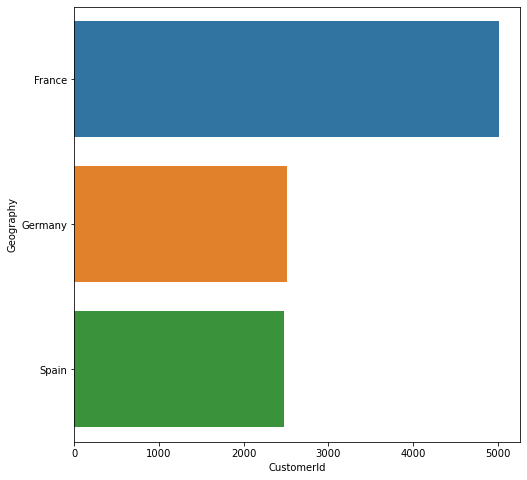

In [17]:
x= mydata.groupby("Geography")['CustomerId'].count().sort_values(ascending= False)
plt.figure(figsize= (8,8))
ax= sns.barplot(x.values,x.index)
ax.set_ylabel("Geography")
ax.set_xlabel("CustomerId")
plt.show()

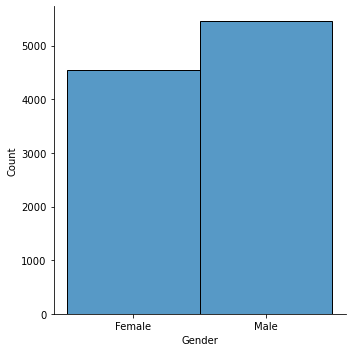

In [18]:
sns.displot (mydata , x = 'Gender', bins = 10)

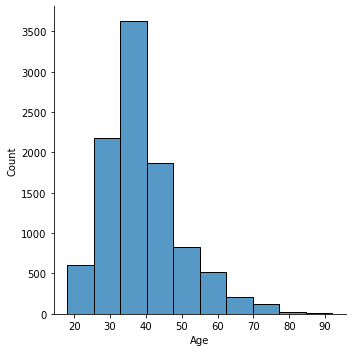

In [19]:
sns.displot (mydata , x = 'Age', bins = 10)

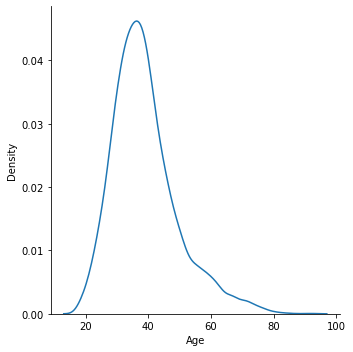

In [20]:
sns.displot (mydata , x = 'Age' , kind = "kde")

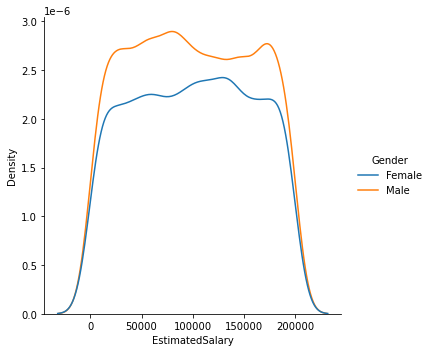

In [21]:
sns.displot (mydata , x = 'EstimatedSalary'  ,hue = 'Gender', kind = "kde")

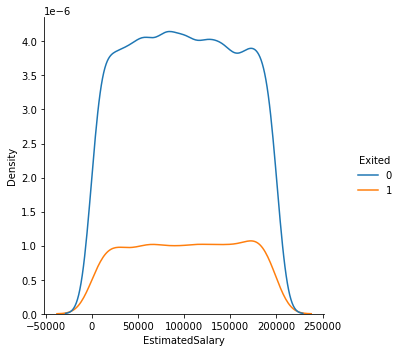

In [22]:
sns.displot (mydata , x = 'EstimatedSalary'  ,hue = 'Exited', kind = "kde")

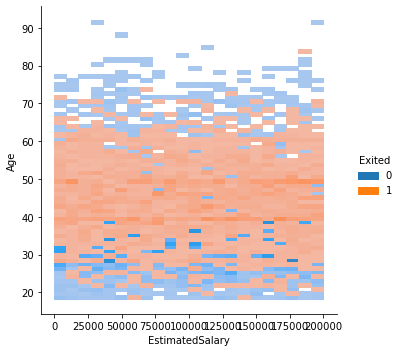

In [23]:
sns.displot (mydata , x = 'EstimatedSalary', y = 'Age', hue = 'Exited', kind = "hist")

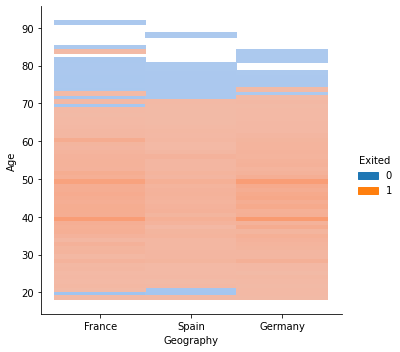

In [24]:
sns.displot (mydata , x = 'Geography', y = 'Age', hue = 'Exited', kind = "hist")

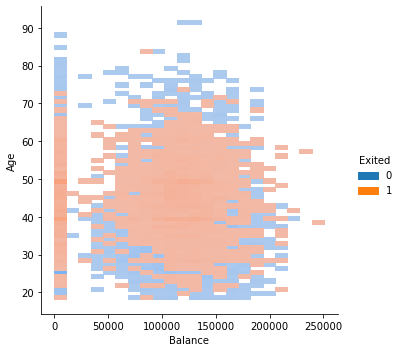

In [25]:
sns.displot (mydata , x = 'Balance', y = 'Age', hue = 'Exited', kind = "hist")

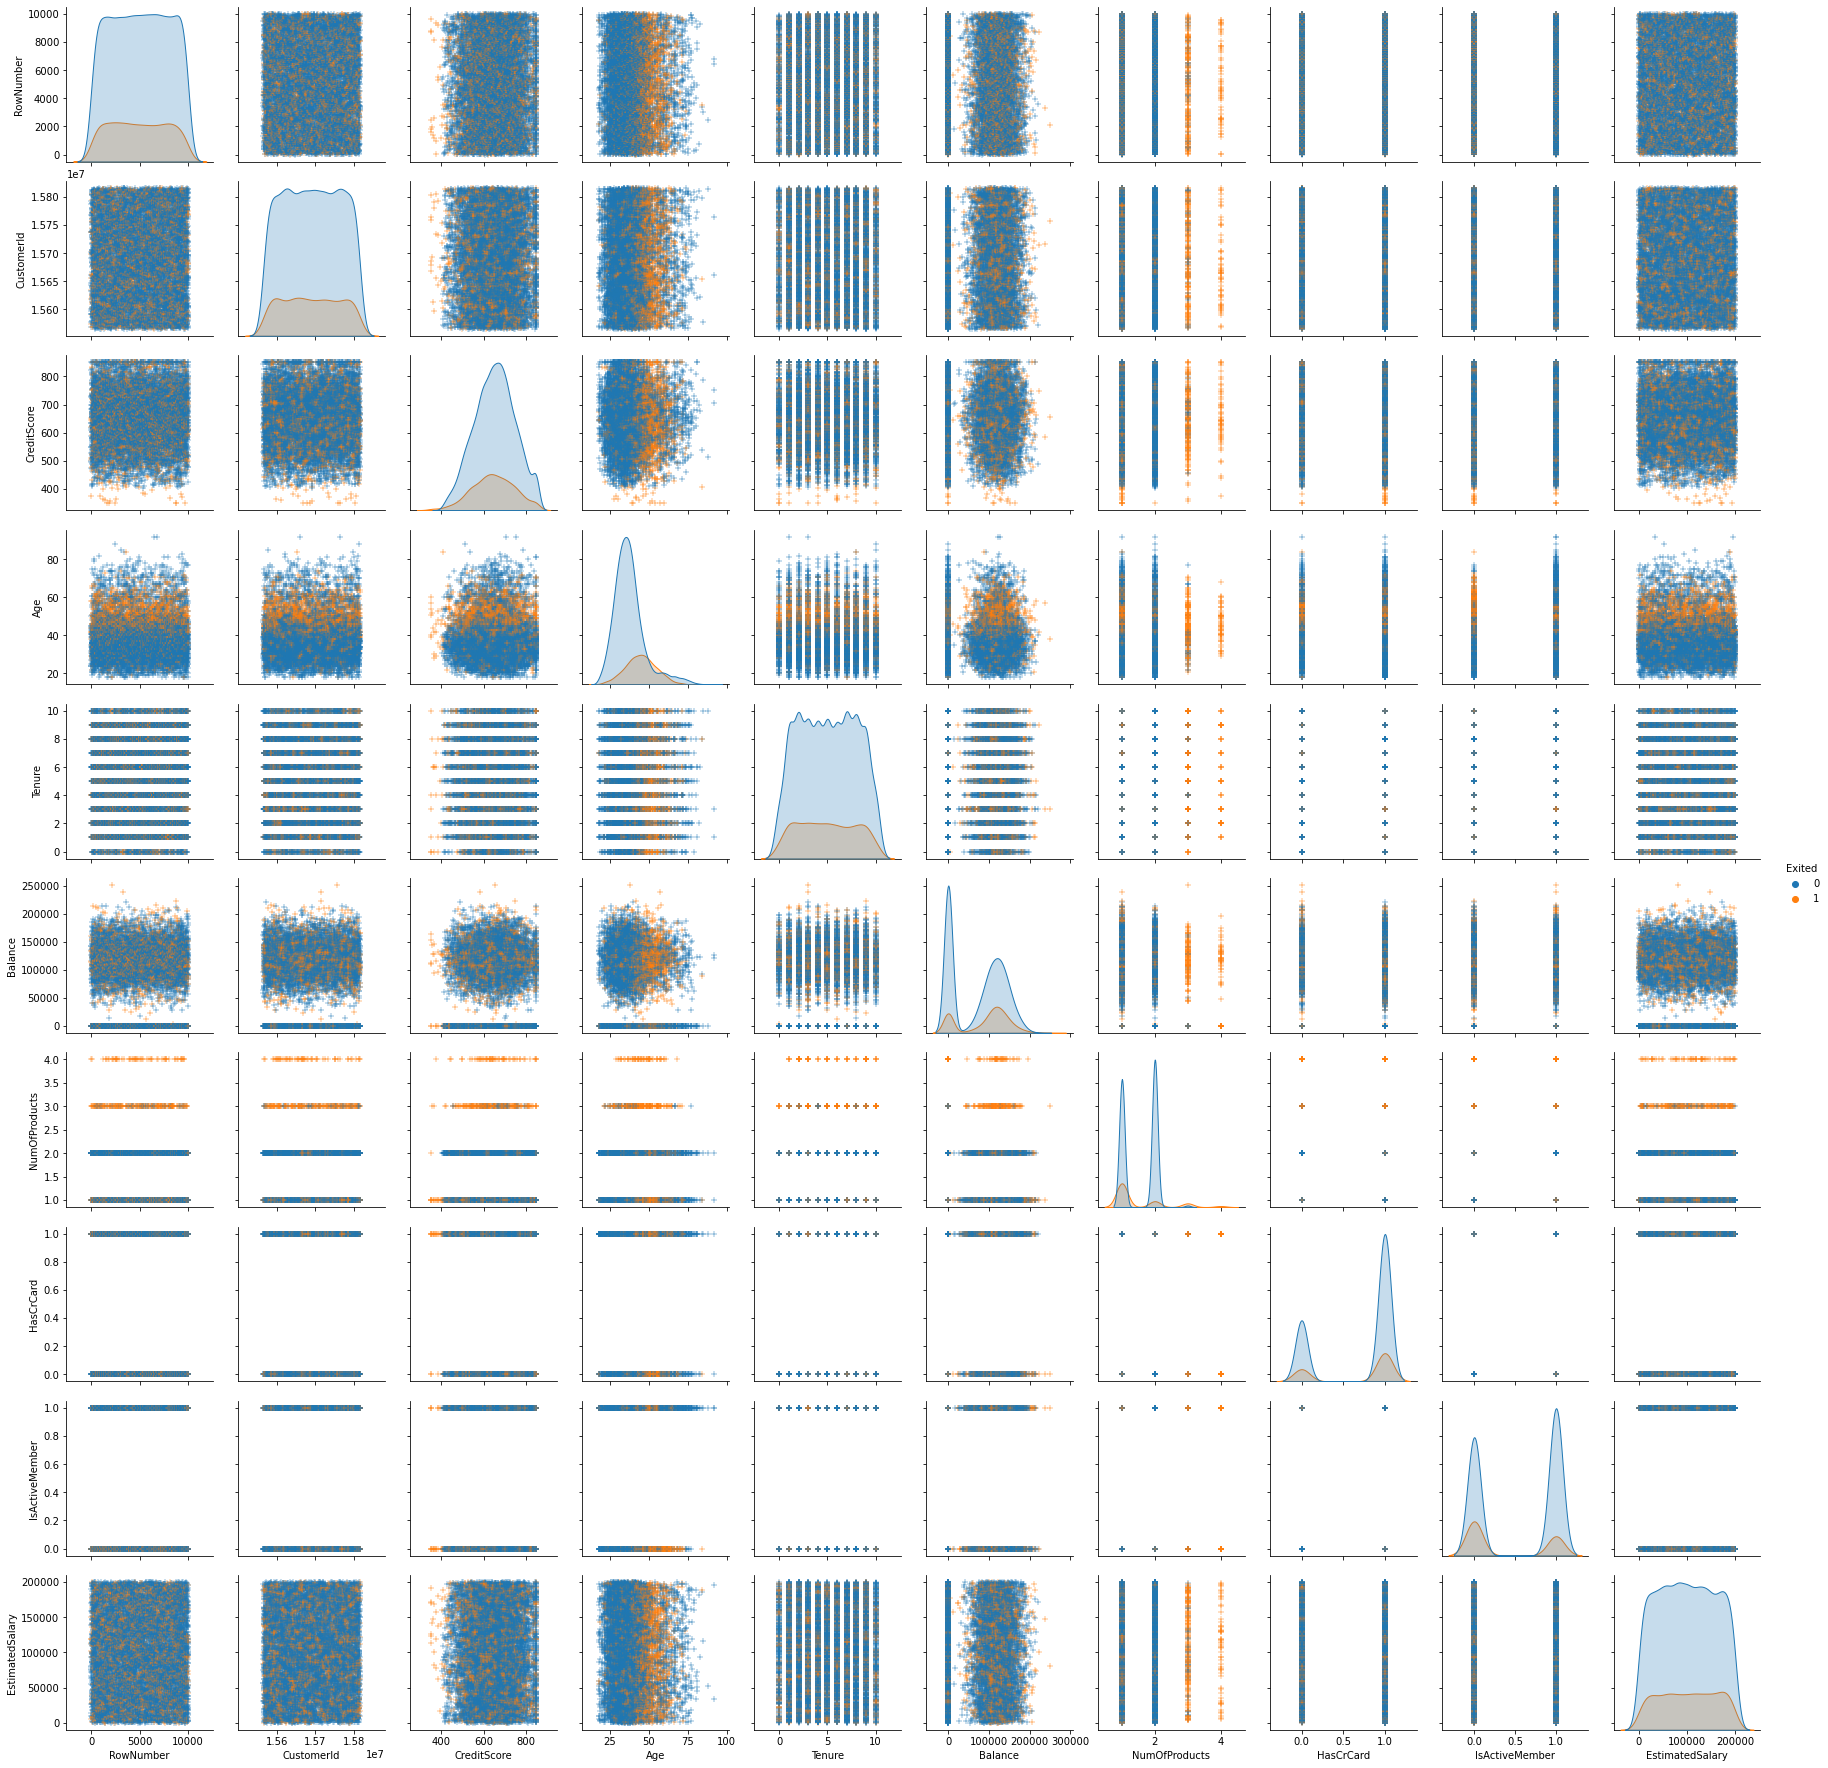

In [26]:
g = sns.pairplot(mydata, hue='Exited', markers='+')
plt.show()

<AxesSubplot:>

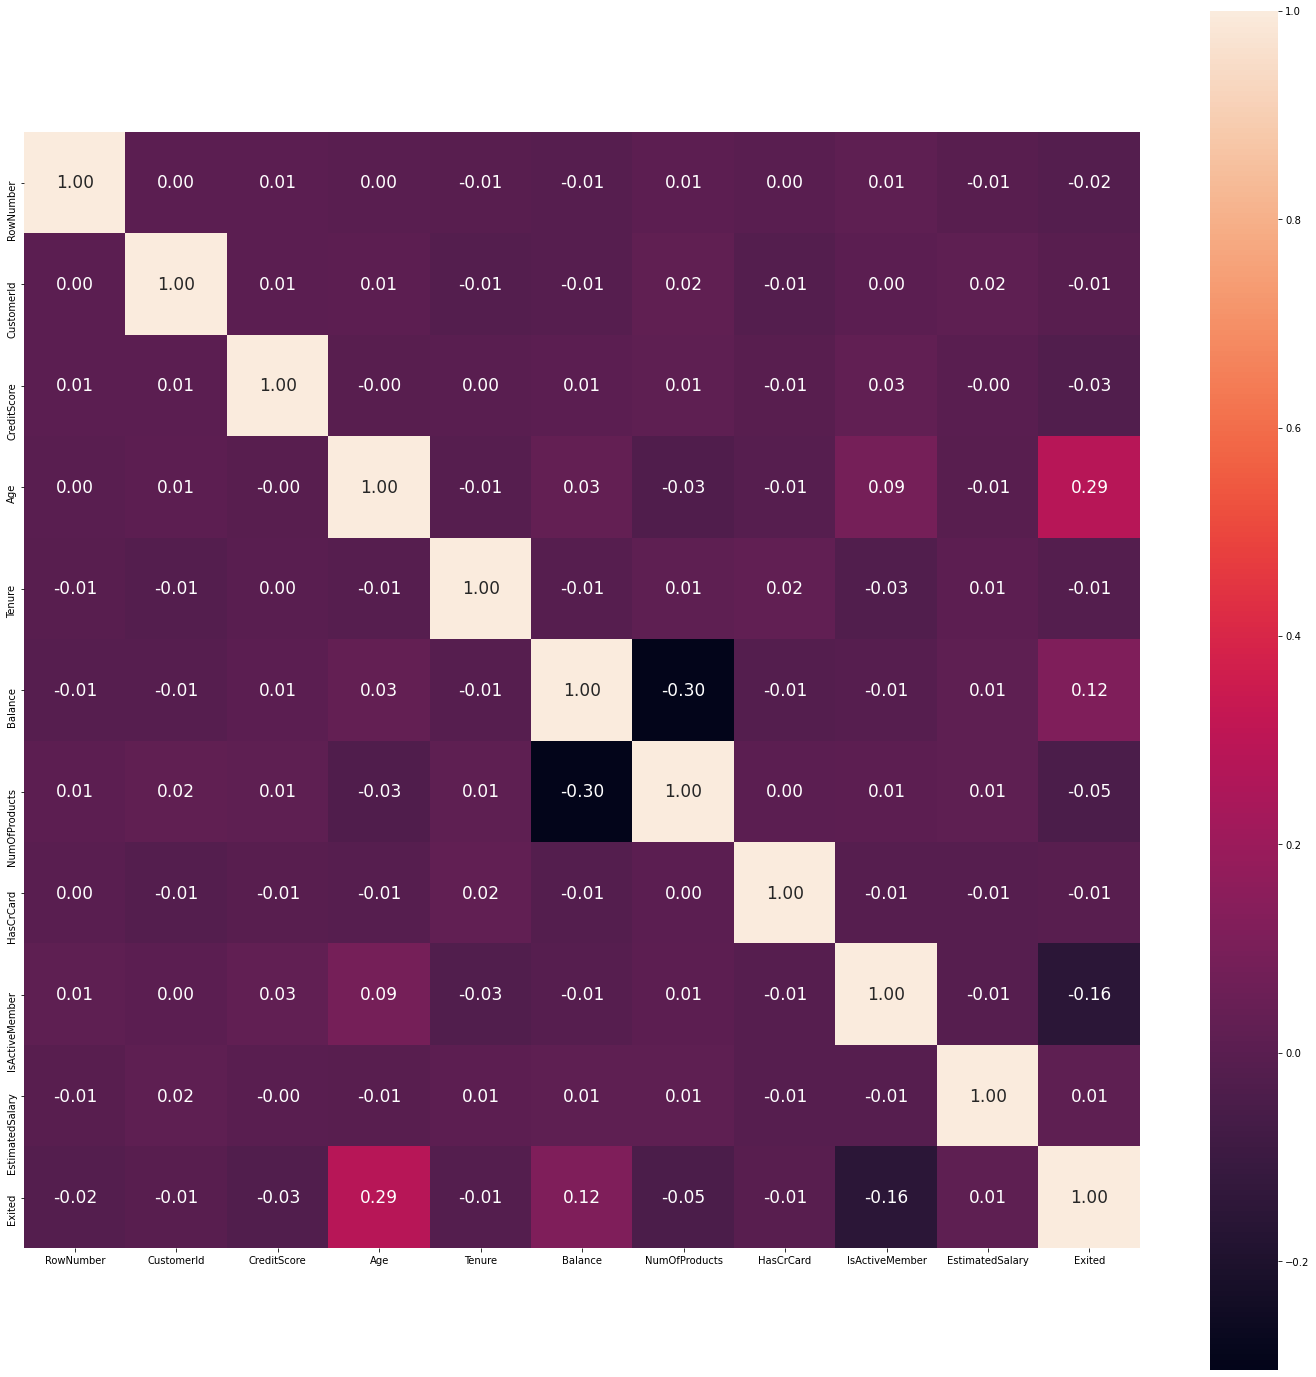

In [27]:
mydata_correlation = mydata.corr()
plt.figure (figsize = (25,25))
sns.heatmap(mydata_correlation , cbar=True, square= True, fmt='.2f', annot=True, annot_kws={'size':17})

In [28]:
mydata_correlation

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


## Prepare Data for Machine learning

In [29]:
mydata.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [30]:
X = mydata.drop(['RowNumber','CustomerId','Surname','Exited'],axis = 1)
#X = mydata.drop(['RowNumber','CustomerId','Surname','CreditScore','NumOfProducts','IsActiveMember','Exited'],axis = 1)
y = mydata['Exited']
print(X.shape)
print(y.shape)

(10000, 10)
(10000,)


In [31]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [32]:
le = LabelEncoder()
X.Gender = le.fit_transform(X.Gender)

In [33]:
le = LabelEncoder()
X.Geography = le.fit_transform(X.Geography)


In [34]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10


In [35]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [36]:
X_train,X_test,y_train,y_test = train_test_split (X,y,test_size=.20 ,random_state= 42)

In [37]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Train your model

## Logistic Regression

In [38]:
logreg = LogisticRegression ()
logreg.fit (X_train,y_train)

LogisticRegression()

In [39]:
y_pred = logreg.predict(X_test)

In [40]:
print('The accuracy of Logistic Regression is: ', (metrics.accuracy_score(y_test, y_pred)))

The accuracy of Logistic Regression is:  0.815


In [41]:
pd.crosstab(logreg.predict(X),y)

Exited,0,1
row_0,,
0,17,2
1,7946,2035


In [42]:
y_pred.shape

(2000,)

In [43]:
confusion_matrix = pd.crosstab( y_pred, y_test , rownames=['Predicted'], colnames=['Actual'])

In [44]:
confusion_matrix

Actual,0,1
Predicted,,
0,1559,322
1,48,71


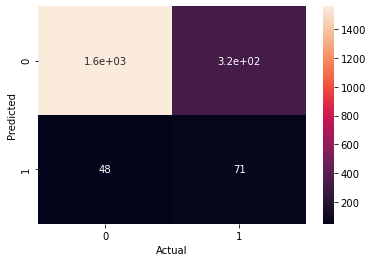

In [45]:
sns.heatmap(confusion_matrix, annot=True)
plt.show()

In [46]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[1559,   48],
       [ 322,   71]], dtype=int64)

In [47]:
accuracy_score(y_test, y_pred)

0.815

In [48]:
recall_score(y_test, y_pred)

0.1806615776081425

In [49]:
precision_score(y_test, y_pred)

0.5966386554621849

In [50]:
f1_score(y_test, y_pred)

0.27734375

In [51]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.97      0.89      1607
           1       0.60      0.18      0.28       393

    accuracy                           0.81      2000
   macro avg       0.71      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



In [52]:
classifier = SVC(kernel = 'rbf', random_state = 0)

In [53]:
classifier.fit(X_train, y_train)

SVC(random_state=0)

In [54]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1571   36]
 [ 249  144]]


In [55]:
accuracy_score(y_test, y_pred)

0.8575

# K-Nearest Neighbor (KNN)

In [56]:
knn = KNeighborsClassifier()

In [57]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [58]:
y_pred = knn.predict(X_test)

In [59]:
knn.score(X_train, y_train)

0.877875

In [60]:
knn.score(X_test, y_test)

0.8355

In [61]:
#Optimal Value Of K 
error_rate = []
for i in range(1,30):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

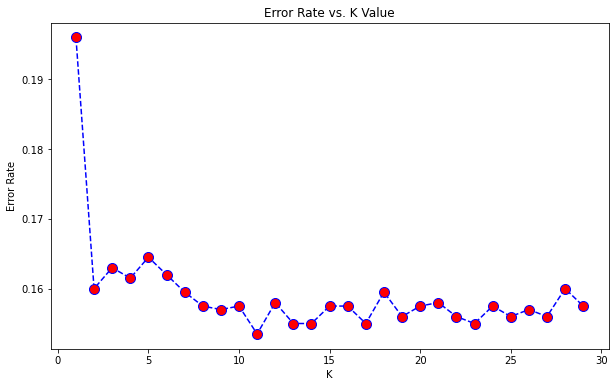

In [62]:
plt.figure(figsize=(10,6))
plt.plot(range(1,30),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [63]:
knn = KNeighborsClassifier(n_neighbors=11)

In [64]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=11)

In [65]:
y_pred = knn.predict(X_test)

In [66]:
knn.score(X_train, y_train)

0.85575

In [67]:
knn.score(X_test, y_test)

0.8465

# Naive Bayes

In [68]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [69]:
y_pred = classifier.predict(X_test)

In [70]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1563   44]
 [ 299   94]]


In [71]:
accuracy_score(y_test,y_pred)

0.8285

# SVM

In [72]:
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(kernel='linear')

In [73]:
y_pred = svclassifier.predict(X_test)

In [74]:
accuracy = accuracy_score(y_test, y_pred) * 100
print("Accuracy of the Logistic Regression Model: ",accuracy)

Accuracy of the Logistic Regression Model:  80.35


# Decision Tree Classification

In [75]:
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [76]:
y_pred = classifier.predict(X_test)

In [77]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1391  216]
 [ 195  198]]


0.7945

## Random Forest Classification

In [78]:
rfc = RandomForestClassifier(criterion = 'entropy', random_state = 0)
rfc.fit(X_train, y_train)

rfc_pred_train = rfc.predict(X_train)
print('Training Set Evaluation F1-Score=>',f1_score(y_train,rfc_pred_train))

Training Set Evaluation F1-Score=> 1.0


In [79]:
rfc_pred_test = rfc.predict(X_test)
print('Testing Set Evaluation F1-Score=>',f1_score(y_test,rfc_pred_test))

Testing Set Evaluation F1-Score=> 0.5795275590551181


In [80]:
rfc.feature_importances_

array([0.14755642, 0.03548743, 0.02019762, 0.23107519, 0.08774914,
       0.14419267, 0.12662428, 0.02028244, 0.03621934, 0.15061546])

## XGBoost Classification

In [81]:
xgbm = XGBClassifier()
xgbm.fit(X_train, y_train)

[23:36:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [82]:
y_pred = xgbm.predict(X_test)

In [83]:
accuracy = accuracy_score(y_test, y_pred) * 100
print("Accuracy of the Logistic Regression Model: ",accuracy)

Accuracy of the Logistic Regression Model:  85.45


## Test the model and show the metrics

My Selection Model is K-Nearest Neighbor (KNN)


In [84]:
knn = KNeighborsClassifier(n_neighbors=11)

In [85]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=11)

In [86]:
y_pred = knn.predict(X_test)

In [87]:
knn.score(X_train, y_train)

0.85575

In [88]:
knn.score(X_test, y_test)

0.8465

In [89]:
print ('mean absolute error is:' , metrics.mean_absolute_error (y_test , y_pred))
print ('mean squared error is:' , metrics.mean_squared_error (y_test , y_pred))
print ('root mean squared error is:' , np.sqrt(metrics.mean_squared_error(y_test , y_pred)))
print('r-squared is :', metrics.r2_score (y_test , y_pred))

mean absolute error is: 0.1535
mean squared error is: 0.1535
root mean squared error is: 0.39179076048319467
r-squared is : 0.027790313054685933


In [90]:
y_pred = knn.predict([[739,2,0,54,8,126418,1,1,0,134421]])

In [91]:
print(y_pred)

[0]


In [92]:
y_pred = knn.predict([[714,0,1,31,4,125169,1,1,1,106637]])

In [93]:
print(y_pred)

[0]


In [94]:
y_pred = knn.predict([[648,1,0,46,9,127209,2,1,0,77406]])

In [95]:
print(y_pred)

[1]


In [96]:
y_pred = knn.predict([[487,2,1,61,5,110368,1,0,0,11384]])

In [97]:
print(y_pred)

[1]
